# Tutorial: the different scalers from scikit-learn applied to TPS9
I write this tutorial while trying to find out which transformations should be applied to the data from [Tabular Playground Series September 2021](https://www.kaggle.com/c/tabular-playground-series-sep-2021). I will examine the impact of the different scalers on feature values and distributions. Many machine learning algorithm require scaling of the features to archeive optimal performance.

For a more comprehensive overview you should visit [this page](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html?highlight=standard%20scaler) from the scikit-learn homepage which compares the different scalers on data from the California Housing Dataset.

----
**Looking forward to your ideas and comments!**

In [14]:
# import packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib
import matplotlib.pyplot as plt
print('Matplotlib: {}'.format(matplotlib.__version__))

import seaborn as sns
print('Seaborn %s' % sns.__version__)
#-------
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Matplotlib: 3.4.3
Seaborn 0.11.2
/kaggle/input/tabular-playground-series-sep-2021/train.csv
/kaggle/input/tabular-playground-series-sep-2021/test.csv
/kaggle/input/tabular-playground-series-sep-2021/sample_solution.csv


In [15]:
# read input files
df_train = pd.read_csv("../input/tabular-playground-series-sep-2021/train.csv")
df_test = pd.read_csv("../input/tabular-playground-series-sep-2021/test.csv")
sample_submission = pd.read_csv("../input/tabular-playground-series-sep-2021/sample_solution.csv")

feature_cols = [col for col in df_train.columns if col.startswith("f")]

In [16]:
def plot_histograms(df,title):
    '''
    takes a data frame and displays histograms of the columns in a x by 4 grid
    title is added on top
    a table with mean and std is added below
    if you use it for more than 8 features the table becomes messy, better use plot_histograms2 then.
    '''

    cols=df.columns.values
    stats = df.describe().loc[["mean","std"]]
    subplot_rows = int( len(cols)// 4 + (len(cols) % 4 > 0)) + 1 # get number of rows needed for histogram grid (=divide the columns by 4 and round up), add 1 for table

    fig=plt.figure(figsize=(20,subplot_rows*4))
    fig.suptitle(title, fontsize=20)

    for i in range(0,len(cols)):
        ax = fig.add_subplot(subplot_rows,4,i+1)
        p1 = sns.histplot(df.iloc[:,i], ax=ax)
        p1.set(ylabel=None)
    
    # add table
    ax_t =  fig.add_subplot(subplot_rows,1,subplot_rows)    
    plt.table(cellText=np.round(stats.values,6), colLabels=stats.columns, rowLabels=["mean","std"], colWidths=tuple([0.1] * len(cols)), cellLoc='center', loc='center')

    ax_t.spines['top'].set_visible(False)
    ax_t.spines['right'].set_visible(False)
    ax_t.spines['left'].set_visible(False)
    ax_t.spines['bottom'].set_visible(False)
    ax_t.get_yaxis().set_ticks([])
    ax_t.get_xaxis().set_ticks([])# set no ticks

    return

In [17]:
# make a function for plotting
def plot_histograms_2(df,title):
    '''
    old function: kept for reference, uses different subplot method
    takes a data frame and displays histograms of the columns in a x by 4 grid
    title is added on top
    '''
    cols=df.columns.values
    subplot_rows = int( len(cols)// 4 + (len(cols) % 4 > 0)) # divide len(cols) by four and round up if no whole number
    fig, ax = plt.subplots(subplot_rows, 4, figsize=(20,subplot_rows*4))
    fig.suptitle(title, fontsize=20)
    cnt = 0
    for column in cols:
        if subplot_rows == 1:
            p1 = sns.histplot(df[column], ax=ax[cnt%4])
        else:
            p1 = sns.histplot(df[column], ax=ax[cnt//4,cnt%4])
        p1.set(ylabel=None) # no header on y axis
        cnt += 1    
    
    return

# get the statistics with
#df.describe().loc[["mean","std"]]

In [18]:
# choose the features you want to examine
# the more features you choose the longer it will take to make the plot
feature_subset=["f1","f9","f29","f35","f50","f73","f96","f100","f116","f118"]
feature_subset_small_a=["f40","f42", "f47","f50"]
feature_subset_small=["f2","f10", "f30","f34"]
df_to_transform = df_train[feature_subset_small]

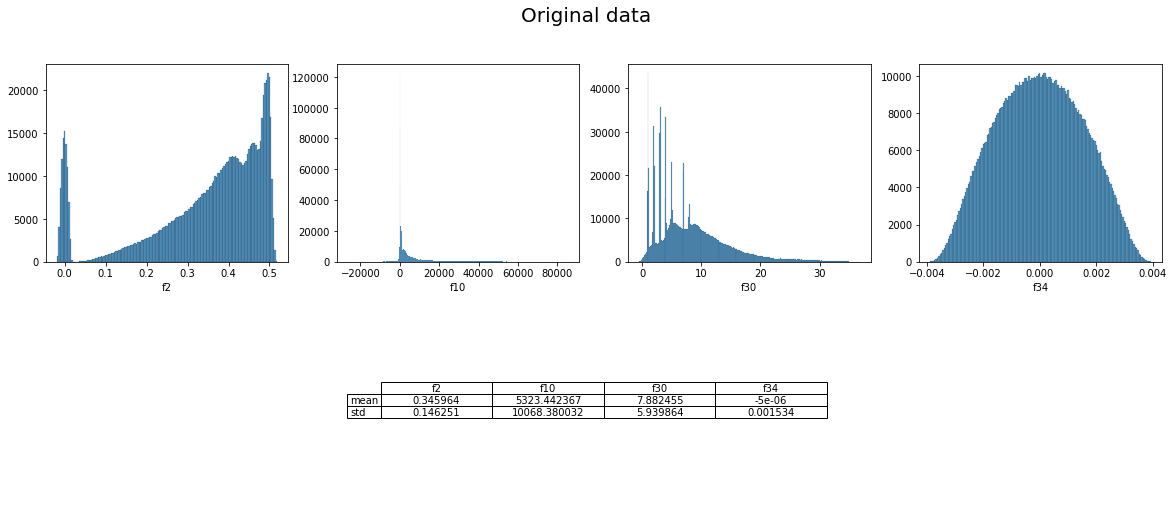

In [19]:
plot_histograms(df_to_transform, "Original data")

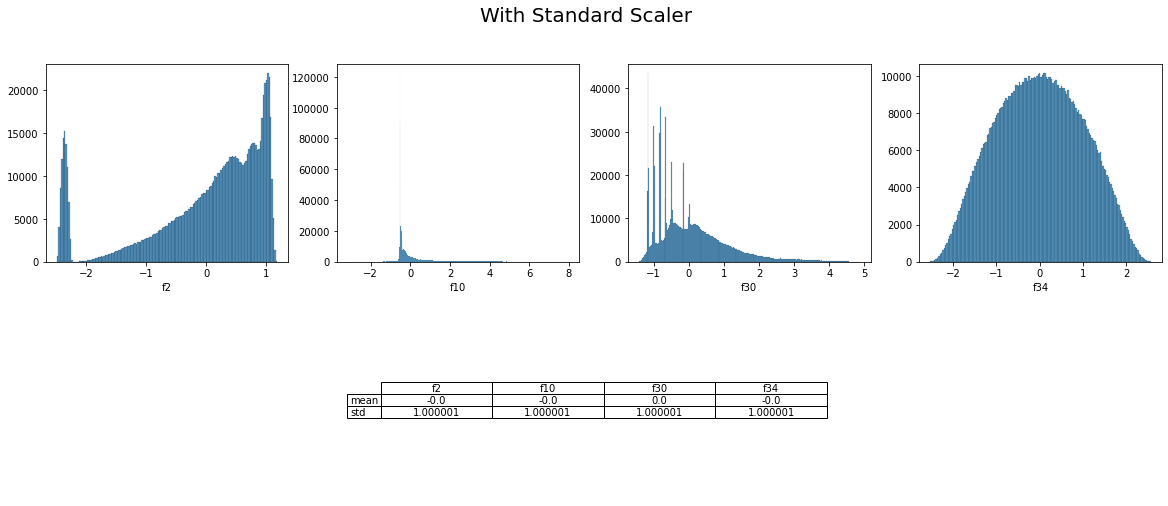

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df_to_transform), columns=df_to_transform.columns)

plot_histograms(df, "With Standard Scaler")

Note how the x-axis changes. The mean of each feature is now (roughly) 0 and the features have a standard deviation of 1.

If you don't want the Scaler to scale the features to a standard deviation of 1, you can set *with_std=False*.

If you dont' want to center the data before scaling, i.e. just calculate x/std, you can set *with_mean=False*.

Just don't set both to False, because then the scaler does nothing ;)

This scaler is very sensitive to the presence of outliers.

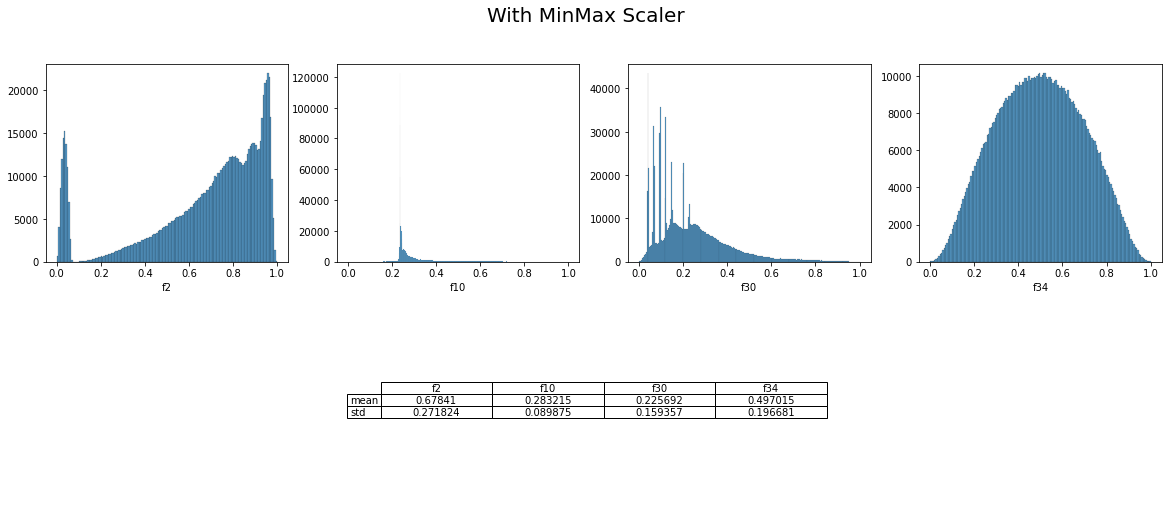

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df_to_transform), columns=df_to_transform.columns)

plot_histograms(df, "With MinMax Scaler")

Note how the x-axis changes. The minimum value is now 0, the maximum value is 1. This is the default setting of the MinMaxScaler. You can change this and scale each feature to any given range.

This scaler is very sensitive to the presence of outliers.

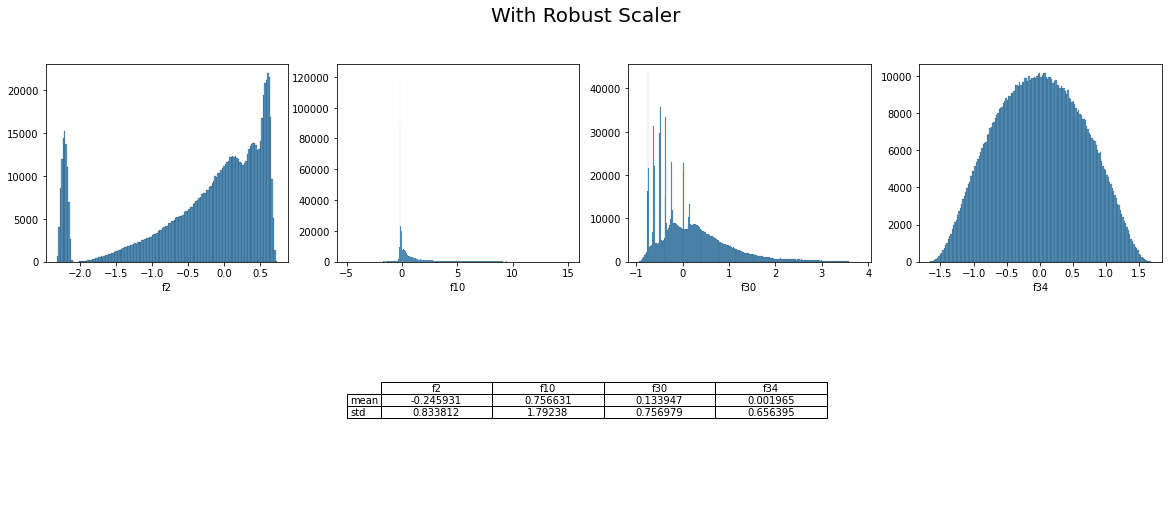

In [22]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df = pd.DataFrame(scaler.fit_transform(df_to_transform), columns=df_to_transform.columns)

plot_histograms(df, "With Robust Scaler")

Note how the x-axis changes again. RobustScaler uses the median and the interquarile range instead of mean and std, like StandardScaler. This reduces the negative effect of outlies on RobustScaler. 

This scaler is robust to outliers.

In [23]:
# transform f10 "by hand" instead of using RobustScaler for demo purposes
q25 = df_train.f10.describe().loc["25%"]
q75 = df_train.f10.describe().loc["75%"]
iqr = q75 -q25
median = df_train.f10.describe().loc["50%"]

f10_scaled = (df_train.f10 - median) / iqr

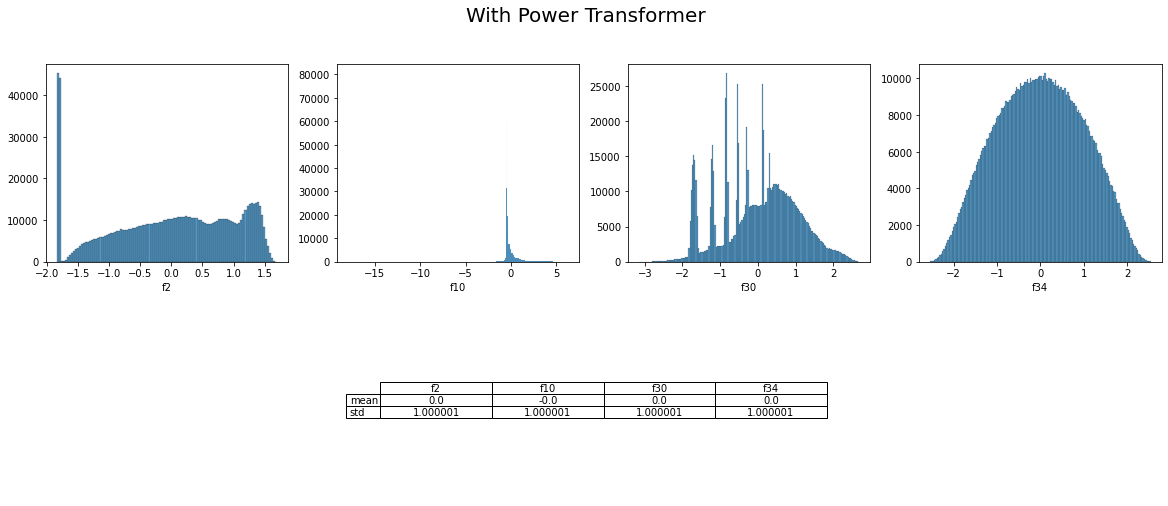

In [24]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
df = pd.DataFrame(transformer.fit_transform(df_to_transform), columns=df_to_transform.columns)

plot_histograms(df, "With Power Transformer")

Note how the x-axis AND the y-axis change. PowerTransformer makes the shapes more Gaussian-like and tries to reduce skewness. As it changes the shape of the distribution it is called "Transformer" instead of "Scaler". Like StandardScaler, PowerTransformer normalizes the data to mean = 0 and std = 1. You can see that for feature f34, which already has a Gaussian-like distribution, PowerTransformer behaves similar to StandardScaler. For other features the changing shape of the distribution is clearly visible.

By default a transformation method called "yeo-johnson" is applied. This is a newer method, compared to the other supported method called "box-cox". The latter dates back to the 1960s and supports only positive values.

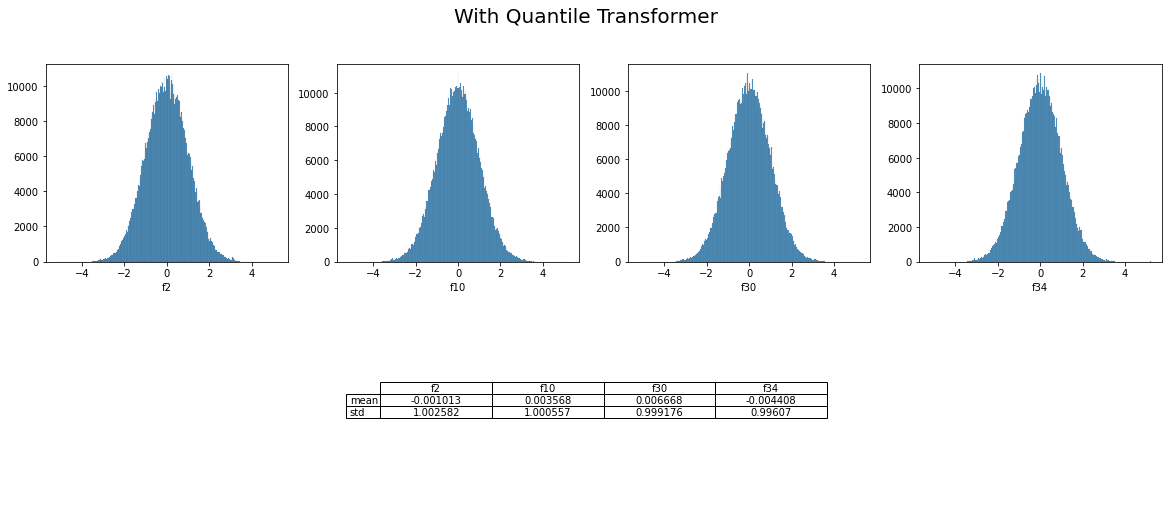

In [25]:
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(output_distribution = 'normal')
df_qt = pd.DataFrame(transformer.fit_transform(df_to_transform), columns=df_to_transform.columns)

plot_histograms(df_qt, "With Quantile Transformer")

Omg, all features look the same now! Well, quite the same. QuantileTransformer does a non-linear transformation which changes all features to fit a normal distribution. If you don't set *output_distribution = 'normal'* it will fit all features to a uniform distribution.

Ouantile transformer is robust to outliers. It distorts correlations between the features.